In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# First RF line test (Transmission)

In [43]:
file_path = r'C:\Users\LocalAdmin\Downloads\freki-rf-tests-2025Feb07.dat'
try:
    df = pd.read_csv(file_path, sep=',')
except FileNotFoundError:
    pass

In [44]:
cols = list(df.columns)
d = {}
for i,c in enumerate(cols):
    if i == 0:
        d['freq'] = df[c].to_numpy()
    if i>2 and i%2 == 1 and i<len(cols)-1:
        d[f'amp_{i//2 -1}'] = df[c].to_numpy() + 1j*df[cols[i+1]].to_numpy()
    

In [46]:
names = [f'Line {i}' for i in range(1,len(d))]

Text(0.5, 1.0, 'S21 gate lines')

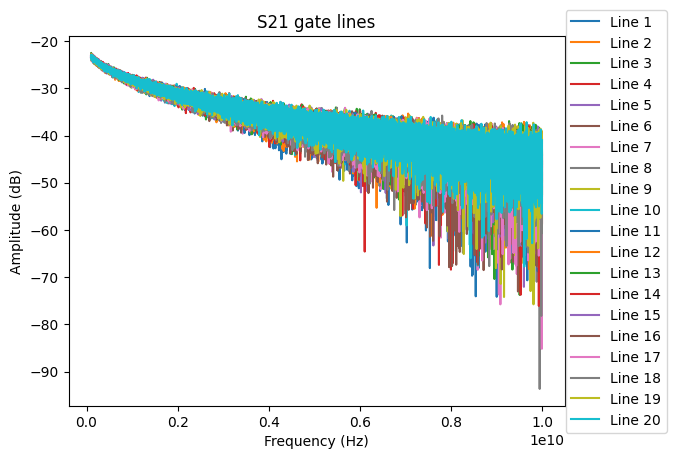

In [53]:
fig, ax = plt.subplots()
for i in range(len(d)-9):
    ax.plot(d['freq'], 20*np.log10(d[f'amp_{i}']), label=names[i])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (dB)')
ax.legend(bbox_to_anchor=(1.22, 1.09))
ax.set_title('S21 gate lines')

Text(0.5, 1.0, 'S21 R and T lines')

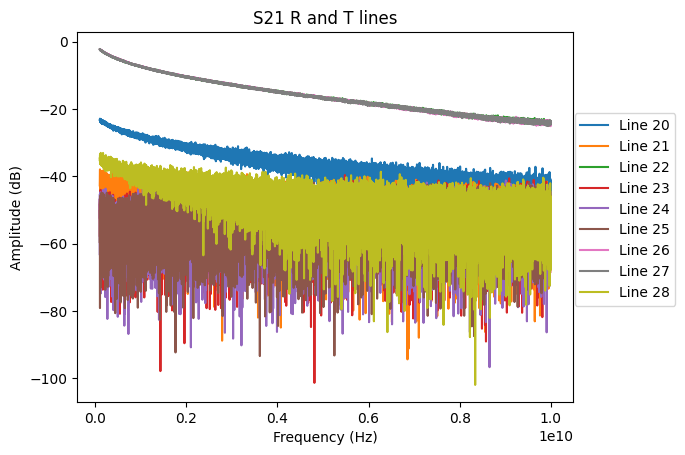

In [56]:
fig, ax = plt.subplots()
for i in range(len(d)-10, len(d)-1):
    ax.plot(d['freq'], 20*np.log10(d[f'amp_{i}']), label=names[i])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (dB)')
ax.legend(bbox_to_anchor=(1.22, 0.8))
ax.set_title('S21 R and T lines')

# Isolator and Directional Coupler installation

In [ ]:


file_path_isol = r'C:\Users\LocalAdmin\Downloads\freki-isolator-11Feb2025.dat'
file_path_dir = r'C:\Users\LocalAdmin\Downloads\freki-dir-coup-12Feb2025.dat'
try:
    # Assuming data is in a structured format like CSV or similar
    df_isol = pd.read_csv(file_path_isol, sep=',')
    df_dir = pd.read_csv(file_path_dir, sep=',')
except FileNotFoundError:
    pass

In [5]:
cols_isol = list(df_isol.columns)
cols_dir = list(df_dir.columns)
d_isol = {}
d_dir = {}
for i, c in enumerate(cols_isol):
    if i==0:
        d_isol['freq'] = df_isol[c].to_numpy()
    if i>2 and i%2 == 1 and i<len(cols_isol)-1:
        d_isol[f'amp_{i//2 -1}'] = df_isol[c].to_numpy() + 1j*df_isol[cols_isol[i+1]].to_numpy()

for i, c in enumerate(cols_dir):
    if i==0:
        d_dir['freq'] = df_dir[c].to_numpy()
    if i>2 and i%2 == 1 and i<len(cols_dir)-1:
        d_dir[f'amp_{i//2 -1}'] = df_dir[c].to_numpy() + 1j*df_dir[cols_dir[i+1]].to_numpy()

In [8]:
d_dir.keys()

dict_keys(['freq', 'amp_0', 'amp_1', 'amp_2', 'amp_3', 'amp_4', 'amp_5'])

In [26]:
names_isol = ['In->Out', 'Out->In', 'Line 26 w isol', 'Line 27 w isol']
names_dir = ['In->Out', 'Out->In', 'CPL->In', 'CPL->Out', 'Out->CPL', 'Line 21->22']


Text(0.5, 1.0, 'Isolator lines wo amplifier')

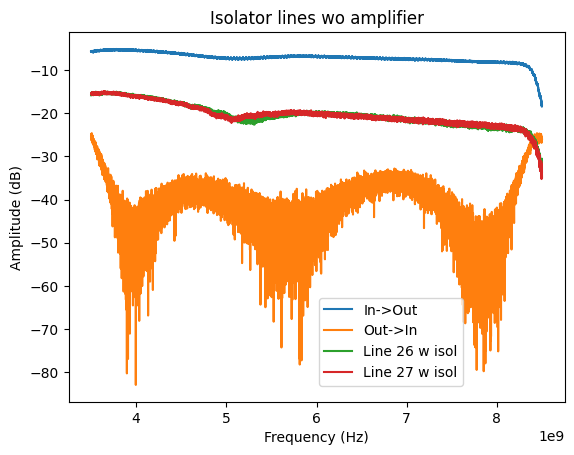

In [ ]:
fig, ax = plt.subplots()
for i in range(len(d_isol)-1):
    ax.plot(d_isol['freq'], 20*np.log10(d_isol[f'amp_{i}']), label=names_isol[i])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (dB)')
ax.legend(bbox_to_anchor=[0.65, 0.3])
ax.set_title('Isolator lines wo amplifier')

(100000.0, 2000000000.0)

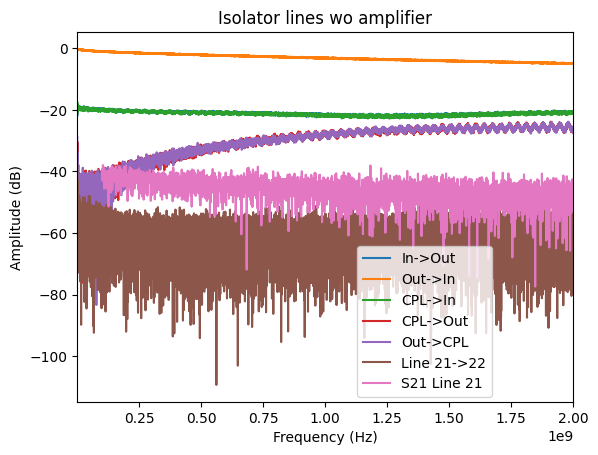

In [60]:
fig, ax = plt.subplots()
for i in range(len(d_dir)-1):
    ax.plot(d_dir['freq'], 20*np.log10(d_dir[f'amp_{i}']), label=names_dir[i])
ax.plot(d['freq'], 20*np.log10(d[f'amp_{len(d)-9}']), label='S21 Line 21')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (dB)')
ax.legend(bbox_to_anchor=[0.7, 0.44])
ax.set_title('Isolator lines wo amplifier')
ax.set_xlim(min(d_dir['freq']), max(d_dir['freq']))

## Amplifiers (to-do)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

file_path = r'C:\Users\LocalAdmin\Downloads\geri-amp-6Feb.dat'

try:
    # Assuming data is in a structured format like CSV or similar
    df_amp = pd.read_csv(file_path, sep=',')
except FileNotFoundError:
    pass

In [9]:
cols_amp = list(df_amp.columns)
d_amp = {}
for i,c in enumerate(cols_amp):
    if i == 0:
        d_amp['freq'] = df_amp[c].to_numpy()
    if i>2 and i%2 == 1 and i<len(cols_amp)-1:
        d_amp[f'amp_{i//2 -1}'] = df_amp[c].to_numpy() + 1j*df_amp[cols_amp[i+1]].to_numpy()
    

In [10]:
d_amp

{'freq': array([1.000000e+08, 1.000950e+08, 1.001900e+08, ..., 1.999810e+09,
        1.999905e+09, 2.000000e+09]),
 'amp_0': array([ 5.64062687e-04+3.14607334e-04j,  8.12661837e-05-3.95326516e-04j,
         1.06428979e-03-3.86857222e-04j, ...,
        -2.24042537e-04+1.14999840e-05j,  9.34683841e-05-5.66148770e-04j,
         8.57464822e-04-4.66270718e-05j]),
 'amp_1': array([0.00200526+0.02881818j, 0.00381927+0.02876043j,
        0.00376459+0.02911599j, ..., 0.00196024+0.00379462j,
        0.00385103+0.00362824j, 0.00228422+0.00153372j])}

0
1


c:\Users\LocalAdmin\anaconda3\envs\resonators\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\LocalAdmin\anaconda3\envs\resonators\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Amplifier @4K')

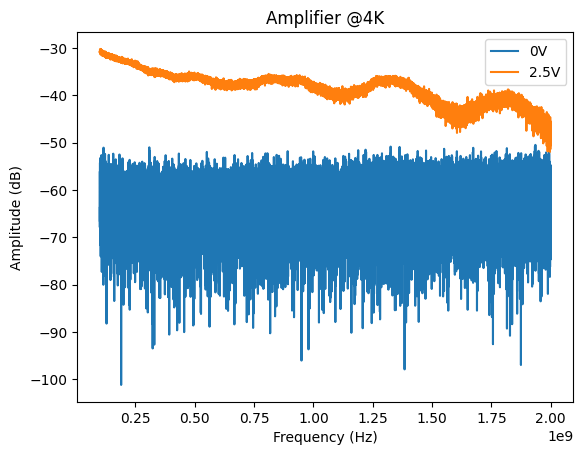

In [ ]:
names_amp = ['0V', '2.5V']
fig, ax = plt.subplots()
for i in range(len(d_amp)-1):
        ax.plot(d_amp['freq'], 20*np.log10(d_amp[f'amp_{i}']), label=names_amp[i])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (dB)')
ax.legend()
ax.set_title('Amplifier @4K')